im_cam shape (500, 600), type int64, max 737


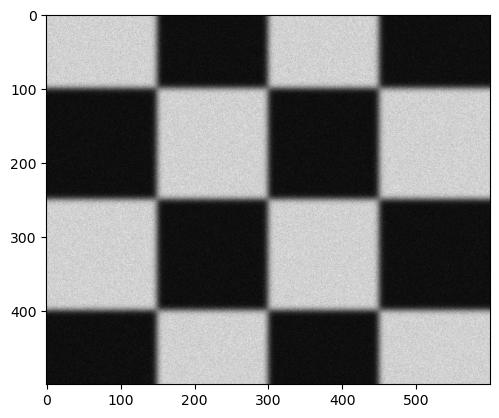

In [2]:
import numpy as np
import opticiq as iq
from opticiq import gen
from matplotlib import pyplot as plt

# generator for making IQ test charts as images, default is 8bit, contrast ratio at only 5
imgen = gen.ChartGen_img([600, 500], cr=5)
im_chart, name = imgen.checkerboard(150, tile=True)
# convert the image generated from PIL.Image back to array of float
im_chart_f = np.array(im_chart, dtype='float')
# this rescaling implies the camera has 2bit more depth then the test chart, and nominal 60% of saturation
im_nom = im_chart_f * 2**2 * 0.6
# simulate a camera return with simulated lens blur and poisson (salt and pepper noise)
im_cam = gen.image_transfer_simple(im_nom, sigma=4, poisson=1, darklevel=3)
print('im_cam shape %s, type %s, max %d' % (im_cam.shape, im_cam.dtype, im_cam.max()))
plt.imshow(im_cam, cmap='gray')

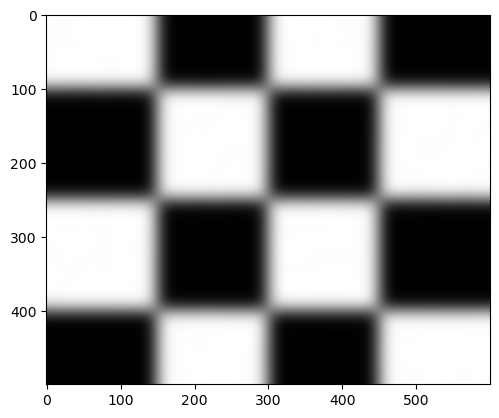

In [3]:
# setup gradients
im_grad = iq.ImGrad(im_cam, sigma=10)
# show the blurred version, note that noise is reduced and gradient zones increased
plt.imshow(im_grad.I1, cmap='gray')

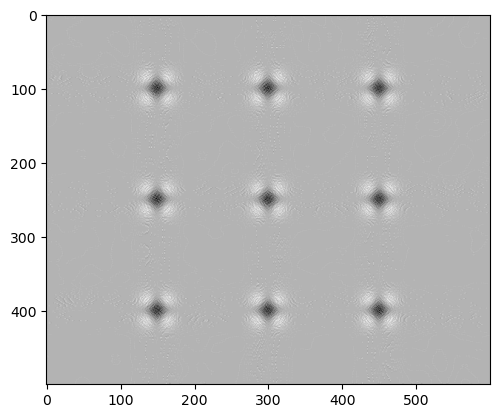

In [4]:
# show Hessian Determinant of blurred
plt.imshow(im_grad.D_hessian, cmap='gray')

TODO
----
* Peak detection with respect to median (or average? or midpoint?) filtering
* Grid intelligence